In [5]:
# Importing the necessary libraries.

import numpy as np # For fast numeric / linear algebra computation.
import time        # For controling time of execution.  
import pickle      # For storing updated Q-table.
import gym         # For working with open AI frozen lake v1 environment and utilities.
import pygame      # For rendering the game and gym dependencies.

from platform import python_version
print("Python Version: ", python_version())
print("Numpy Version: ", np.__version__)
print("Gym Version: ", gym.__version__)
print("Pygame Version: ", pygame.__version__)

Python Version:  3.11.2
Numpy Version:  1.23.5
Gym Version:  0.24.0
Pygame Version:  2.3.0


In [4]:
# Hyper-Parameters

total_episodes = 10000 # Total number of iterations or episodes of training.

# A higher value of epsilon encourages more exploration, while a lower value of epsilon favors exploitation.
epsilon = 0.9 # For epsilon-gready policy, Positive real number (0 < epsilon < 1)

max_steps = 100 # Maximum number of steps that agent can take in environment

lr_rate = 0.81 # Learning Rate of convergence to global minimum

# A high discount factor means that future rewards are highly valued, while a 
# low discount factor means that immediate rewards are given greater weight
gamma = 0.96 # Discount Factor, Positive real number (0 < gamma < 1)

In [8]:
# creating environment using gym package.
# Default parameters:- gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
# For more information:- https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

env = gym.make("FrozenLake-v1") # Using FrozenLake-v1. Since FrozenLake-v0 is depricated.

In [10]:
print("Number of observation states:- ", env.observation_space.n)
print("Number of action space :- ", env.action_space.n)

Number of observation states:-  16
Number of action space :-  4


In [11]:
# Initializing the Q-table with zeros for 2-D array of (observation_space, action_space).

Q = np.zeros((env.observation_space.n, env.action_space.n))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
def choose_action(state):
    """ 
    The choose_action() function used a Epsilon-Gready policy for Exploration and Exploitation.
    
    Exploration is done when uniform random number from 0 to 1 is less than epsilon value.
    Else, Maximum value of the state and action pair is taken which is Exploitation.

    Args:
        state (int): Gets the current state as parameter/

    Returns:
        int: Returns action to be taken in that state
    """
    action=0
    if np.random.uniform(0, 1) < epsilon: # Epsilon-Gready policy
        action = env.action_space.sample() # Exploration, Random action sample space
    else:
        action = np.argmax(Q[state, :]) # Exploitation, Maximum value is taken from (State, Action)
    return action

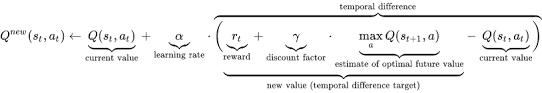

In [17]:
from IPython.display import Image


Image(filename='Q-Formula.png') 

In [ ]:
def learn(state, state2, reward, action):
    """ 
    Updates the Q-table.
    Agent learn to find a optimal policy by using bellman optimality equation.

    Args:
        state (int): Current state
        state2 (int): Future state
        reward (int): Reward if rached to goal state
        action (int): action states
    """
    predict = Q[state, action]
    target = reward + gamma * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + lr_rate * (target - predict)

In [ ]:
# Start with Reinforment Learning
for episode in range(total_episodes):
    state = env.reset() # Resetting the environment
    t = 0
    
    while t < max_steps:
        env.render() # Rendering the frozen-lake environment

        action = choose_action(state)  # Taking action
        # Returns new_state, reward after taking a action, done (boolean) whether reached to goal or not, information
        state2, reward, done, info = env.step(action)  

        learn(state, state2, reward, action) # Agent learns Q-table policy

        state = state2 # Setting state to new state 

        t += 1
       
        if done: # If goal state is reached then true and loop breaks
            break

        time.sleep(0.1)

In [ ]:
# Dumping the Q-table in pickle file for easy loading when needed.

with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)

In [ ]:
# Q-Table Representation

# Q = [[0.61328675 0.58403178 0.59475622 0.60545697]
#  [0.56521894 0.11293677 0.50370929 0.60326189]
#  [0.59057488 0.58249108 0.57499097 0.59089953]
#  [0.57255264 0.01738344 0.57441336 0.59935962]
#  [0.62387633 0.5546865  0.71629256 0.11403143]
#  [0.         0.         0.         0.        ]
#  [0.64606929 0.71730524 0.73581135 0.11986364]
#  [0.         0.         0.         0.        ]
#  [0.61203901 0.70121817 0.69993882 0.79860727]
#  [0.1464226  0.87045385 0.16544007 0.13804508]
#  [0.91957935 0.91595476 0.57216828 0.68562543]
#  [0.         0.         0.         0.        ]
#  [0.         0.         0.         0.        ]
#  [0.81536073 0.03436849 0.87831349 0.70812791]
#  [0.95772482 0.88879209 0.92707794 0.99582979]
#  [0.         0.         0.         0.        ]]

In [6]:
import os

env = gym.make('FrozenLake-v1') # Create an instance of the FrozenLake-v1 environment

# Un-pickling the pickle file using load() function. To convert from pickle to python object.
with open("frozenLake_qTable.pkl", 'rb') as f: 
	Q = pickle.load(f)

# Choosing the maximum value from the state and action
def choose_action(state):
	action = np.argmax(Q[state, :])
	return action

# Rendering the environment and choosing the best action based on policy
for episode in range(5):

	state = env.reset()
	print("*** Episode: ", episode)
	t = 0
	while t < 100:
		env.render() # Resetting the environment

		action = choose_action(state)  
		
		state2, reward, done, info = env.step(action)  
		
		state = state2

		if done:
			break

		time.sleep(0.5)
		os.system('clear')

pygame.quit() # Closing the pygame window.

*** Episode:  0
*** Episode:  1
*** Episode:  2
*** Episode:  3
*** Episode:  4
